In [1]:
import os
import pandas as pd

In [16]:
data_dir = r'C:\Users\solharsh\Desktop\Data Science\Machine Learning\Jigsaw\Decision Trees\Data\Data'
os.chdir(data_dir)

In [28]:
df = pd.read_csv("dm.csv")
df

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151
...,...,...,...,...,...,...,...,...,...,...,...
995,Young,Female,Rent,Single,Close,19400,1,NaN,18,384,190
996,Middle,Male,Rent,Single,Far,40500,1,NaN,18,1073,510
997,Old,Male,Own,Single,Close,44800,0,Medium,24,1417,725
998,Middle,Male,Own,Married,Close,79000,2,Medium,18,671,1034


In [29]:
df.columns

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
       'History', 'Catalogs', 'AmountSpent', 'Cust_Id'],
      dtype='object')

In [30]:
X = df.drop(['Cust_Id','AmountSpent'],axis=1)

In [31]:
X.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs
0,Old,Female,Own,Single,Far,47500,0,High,6
1,Middle,Male,Rent,Single,Close,63600,0,High,6
2,Young,Female,Rent,Single,Close,13500,0,Low,18
3,Middle,Male,Own,Married,Close,85600,1,High,18
4,Middle,Female,Own,Single,Close,68400,0,High,12


In [32]:
df.describe()

,Salary,Children,Catalogs,AmountSpent,Cust_Id
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,56103.900000,0.93400,14.682000,1216.770000,643.930000
std,30616.314826,1.05107,6.622895,961.068613,369.047166
min,10100.000000,0.00000,6.000000,38.000000,12.000000
25%,29975.000000,0.00000,6.000000,488.250000,316.750000
50%,53700.000000,1.00000,12.000000,962.000000,636.000000
75%,77025.000000,2.00000,18.000000,1688.500000,955.500000
max,168800.000000,3.00000,24.000000,6217.000000,1297.000000


In [37]:
X = pd.get_dummies(X)
X.head()

,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
0,47500,0,6,0,1,0,1,0,1,0,0,1,0,1,1,0,0
1,63600,0,6,1,0,0,0,1,0,1,0,1,1,0,1,0,0
2,13500,0,18,0,0,1,1,0,0,1,0,1,1,0,0,1,0
3,85600,1,18,1,0,0,0,1,1,0,1,0,1,0,1,0,0
4,68400,0,12,1,0,0,1,0,1,0,0,1,1,0,1,0,0


In [34]:
Y = df['AmountSpent']
Y.head()

0     755
1    1318
2     296
3    2436
4    1304
Name: AmountSpent, dtype: int64

In [39]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,Y,test_size=0.2,random_state=200)

In [42]:
import sklearn.tree as tree
reg=tree.DecisionTreeRegressor(max_depth=3)
reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [43]:
reg.score(X_test,y_test)

0.5915701153457273

In [44]:
reg.feature_importances_

array([0.68060902, 0.        , 0.17771448, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03685946,
       0.04537282, 0.05944422])

In [45]:
pd.Series(reg.feature_importances_,index=X.columns).sort_values(ascending=False).head(5)

Salary            0.680609
Catalogs          0.177714
History_Medium    0.059444
History_Low       0.045373
History_High      0.036859
dtype: float64

In [46]:
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
os.chdir(data_dir) 

In [47]:
dot_data = tree.export_graphviz(reg, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data) 

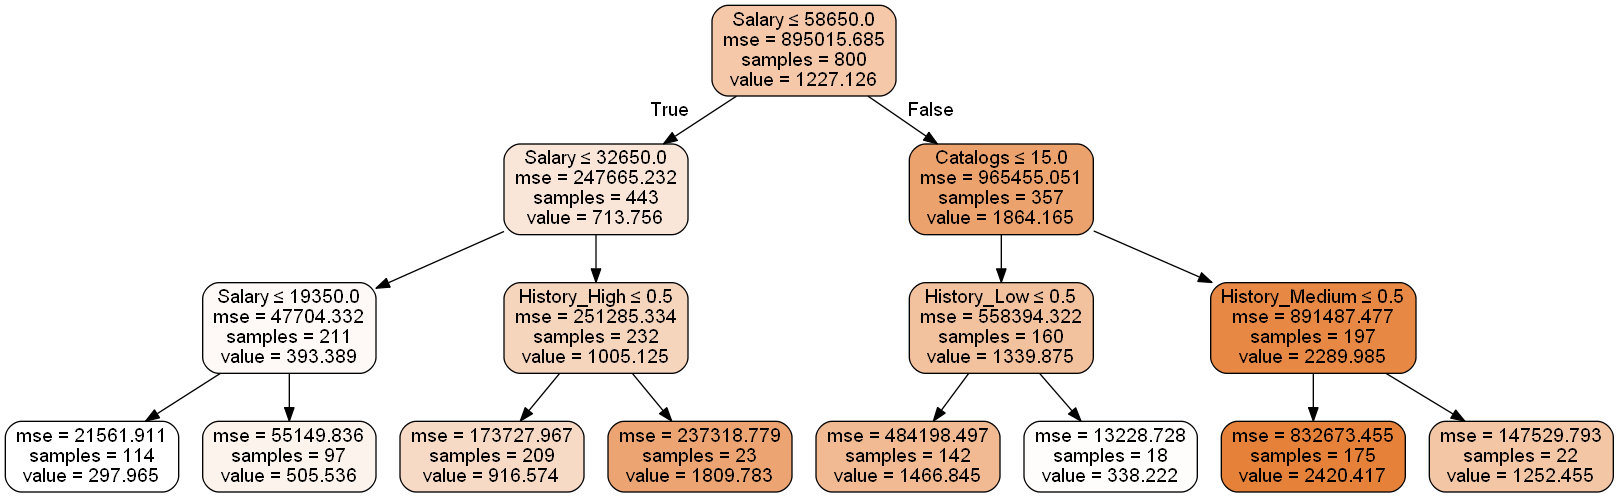

In [48]:
from IPython.display import Image
Image(graph.create_png())